In [94]:
import pandas as pd
from scipy import stats
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from scipy import stats
%matplotlib inline

# Read Data

In [95]:
df=pd.read_csv("/kaggle/input/students-performance-in-exams/StudentsPerformance.csv")

<div style="border-radius:60px; border:indigo solid; padding: 20px; background-color:#A47BE4; font-size:160%; text-align:center; justify-content: flex-start">
Load the dataset into a pandas dataframe and display the first 10 rows of the dataframe to gain familiarity with the data structure.




In [96]:
df.head(10)

,gender,race/ethnicity,parental level of education,lunch,test preparation course,math score,reading score,writing score
0,female,group B,bachelor's degree,standard,none,72,72,74
1,female,group C,some college,standard,completed,69,90,88
2,female,group B,master's degree,standard,none,90,95,93
3,male,group A,associate's degree,free/reduced,none,47,57,44
4,male,group C,some college,standard,none,76,78,75
5,female,group B,associate's degree,standard,none,71,83,78
6,female,group B,some college,standard,completed,88,95,92
7,male,group B,some college,free/reduced,none,40,43,39
8,male,group D,high school,free/reduced,completed,64,64,67
9,female,group B,high school,free/reduced,none,38,60,50


In [97]:
df.shape

(1000, 8)

In [98]:
df.describe()

,math score,reading score,writing score
count,1000.00000,1000.000000,1000.000000
mean,66.08900,69.169000,68.054000
std,15.16308,14.600192,15.195657
min,0.00000,17.000000,10.000000
25%,57.00000,59.000000,57.750000
50%,66.00000,70.000000,69.000000
75%,77.00000,79.000000,79.000000
max,100.00000,100.000000,100.000000


In [99]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 8 columns):
 #   Column                       Non-Null Count  Dtype 
---  ------                       --------------  ----- 
 0   gender                       1000 non-null   object
 1   race/ethnicity               1000 non-null   object
 2   parental level of education  1000 non-null   object
 3   lunch                        1000 non-null   object
 4   test preparation course      1000 non-null   object
 5   math score                   1000 non-null   int64 
 6   reading score                1000 non-null   int64 
 7   writing score                1000 non-null   int64 
dtypes: int64(3), object(5)
memory usage: 62.6+ KB


In [100]:
df.isnull().sum()

gender                         0
race/ethnicity                 0
parental level of education    0
lunch                          0
test preparation course        0
math score                     0
reading score                  0
writing score                  0
dtype: int64

# Before Remove Outliers

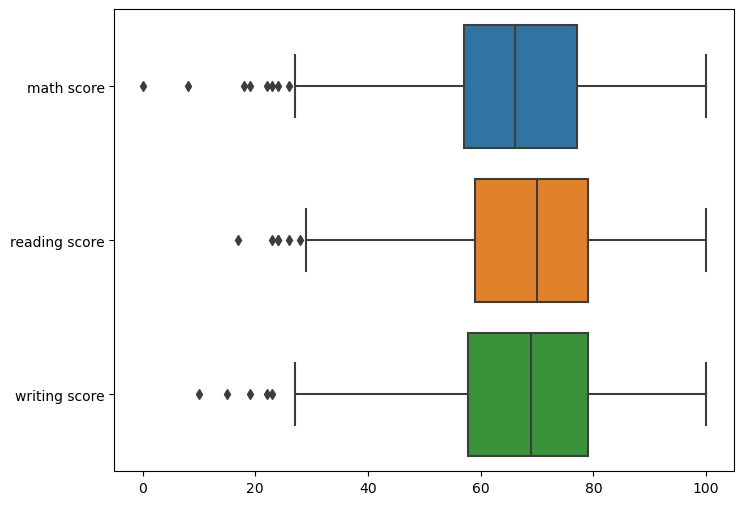

In [101]:
plt.figure(figsize=(8,6))
sns.boxplot(data=df[["math score","reading score","writing score"]],orient="h")
plt.show()

In [102]:
print("Mean value of Math Score",df['math score'].mean())
print("Standard deviation of  Math Score",df['math score'].std())
print("Minimum value of  Math Score",df['math score'].min())
print("Maximum value of  Math Score",df['math score'].max())

Mean value of Math Score 66.089
Standard deviation of  Math Score 15.16308009600945
Minimum value of  Math Score 0
Maximum value of  Math Score 100


In [103]:
upper_limit= df["math score"].mean() + 3*df["math score"].std()

lower_limit= df["math score"].mean() - 3*df["math score"].std()
print("Upper Limit :",upper_limit)
print("Lower Limit :",lower_limit)

Upper Limit : 111.57824028802835
Lower Limit : 20.59975971197165


# Find Outliers For_Math_Score

In [104]:
df[(df['math score'] > upper_limit) | (df['math score'] < lower_limit)]

,gender,race/ethnicity,parental level of education,lunch,test preparation course,math score,reading score,writing score
17,female,group B,some high school,free/reduced,none,18,32,28
59,female,group C,some high school,free/reduced,none,0,17,10
787,female,group B,some college,standard,none,19,38,32
980,female,group B,high school,free/reduced,none,8,24,23


In [105]:
trim_df = df[(df['math score'] > lower_limit) & (df["math score"] < upper_limit)]
df["math score"]=trim_df["math score"]
print("Before Triming :",len(df))
print("After Triming :",len(trim_df))
print("Outliers :",len(df)-len(trim_df))

Before Triming : 1000
After Triming : 996
Outliers : 4


# Find Outliers For_Reading Score

In [106]:
print("Mean value of Reading Score",df['reading score'].mean())
print("Standard deviation of  Reading Score",df['reading score'].std())
print("Minimum value of  Reading Score",df['reading score'].min())
print("Maximum value of  Reading Score",df['reading score'].max())

Mean value of Reading Score 69.169
Standard deviation of  Reading Score 14.600191937252216
Minimum value of  Reading Score 17
Maximum value of  Reading Score 100


In [107]:
upper_limit1=df['reading score'].mean() + 3*df['reading score'].std()
lower_limit1=df['reading score'].mean() - 3*df['reading score'].std()
print("Upper Limit is :",upper_limit1)
print("Lower Limit is :",lower_limit1)

Upper Limit is : 112.96957581175664
Lower Limit is : 25.368424188243353


In [108]:
df.loc[(df["reading score"]>upper_limit1) | (df["reading score"]<lower_limit1)]

,gender,race/ethnicity,parental level of education,lunch,test preparation course,math score,reading score,writing score
59,female,group C,some high school,free/reduced,none,NaN,17,10
327,male,group A,some college,free/reduced,none,28.0,23,19
596,male,group B,high school,free/reduced,none,30.0,24,15
980,female,group B,high school,free/reduced,none,NaN,24,23


In [109]:
trim_df1=df.loc[(df["reading score"]<upper_limit1) & (df["reading score"]>lower_limit1)]
df["reading score"]=trim_df1["reading score"]
print("Before Triming :",len(df))
print("After Triming :",len(trim_df1))
print("Outliers :",len(df)-len(trim_df1))

Before Triming : 1000
After Triming : 996
Outliers : 4


# Find Outliers For_Writing Score

In [110]:
print("Mean value of Writing Score",df['writing score'].mean())
print("Standard deviation of  Writing Score",df['writing score'].std())
print("Minimum value of  Writing Score",df['writing score'].min())
print("Maximum value of  Writing Score",df['writing score'].max())

Mean value of Writing Score 68.054
Standard deviation of  Writing Score 15.19565701086965
Minimum value of  Writing Score 10
Maximum value of  Writing Score 100


In [111]:
upper_limit2=df['writing score'].mean() + 3*df['writing score'].std()
lower_limit2=df['writing score'].mean() - 3*df['writing score'].std()
print("Upper Limit is :",upper_limit2)
print("Lower Limit is :",lower_limit2)

Upper Limit is : 113.64097103260895
Lower Limit is : 22.46702896739105


In [112]:
df.loc[(df["writing score"]>upper_limit2) | (df["writing score"]<lower_limit2)]

,gender,race/ethnicity,parental level of education,lunch,test preparation course,math score,reading score,writing score
59,female,group C,some high school,free/reduced,none,NaN,NaN,10
76,male,group E,some high school,standard,none,30.0,26.0,22
327,male,group A,some college,free/reduced,none,28.0,NaN,19
596,male,group B,high school,free/reduced,none,30.0,NaN,15


In [113]:
trim_df2=df.loc[(df["writing score"]<upper_limit2) & (df["writing score"]>lower_limit2)]
df["writing score"]=trim_df2["writing score"]
print("Before Triming :",len(df))
print("After Triming :",len(trim_df2))
print("Outliers :",len(df)-len(trim_df2))

Before Triming : 1000
After Triming : 996
Outliers : 4


# After Remove Outliers

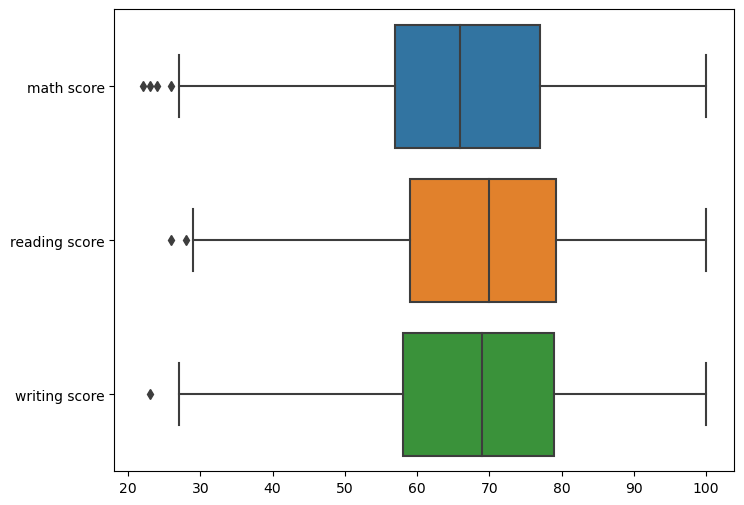

In [114]:
plt.figure(figsize=(8,6))
sns.boxplot(data=df[["math score","reading score","writing score"]],orient="h")
plt.show()

In [115]:
df.isnull().sum()

gender                         0
race/ethnicity                 0
parental level of education    0
lunch                          0
test preparation course        0
math score                     4
reading score                  4
writing score                  4
dtype: int64

# Fill Null Values With Mean Values

In [116]:
df['reading score'].fillna(df['reading score'].mean(), inplace=True)
df['writing score'].fillna(df['writing score'].mean(), inplace=True)
df['math score'].fillna(df['math score'].mean(), inplace=True)

In [117]:
df.isnull().sum()

gender                         0
race/ethnicity                 0
parental level of education    0
lunch                          0
test preparation course        0
math score                     0
reading score                  0
writing score                  0
dtype: int64

In [118]:
df.head()

,gender,race/ethnicity,parental level of education,lunch,test preparation course,math score,reading score,writing score
0,female,group B,bachelor's degree,standard,none,72.0,72.0,74.0
1,female,group C,some college,standard,completed,69.0,90.0,88.0
2,female,group B,master's degree,standard,none,90.0,95.0,93.0
3,male,group A,associate's degree,free/reduced,none,47.0,57.0,44.0
4,male,group C,some college,standard,none,76.0,78.0,75.0


<div style="border-radius:60px; border:indigo solid; padding: 20px; background-color:#A47BE4; font-size:160%; text-align:center; justify-content: flex-start">
  Perform data visualization: 
    
- Create a bar plot to show the distribution of male and female students in the dataset. 
- Create a histogram to show the distribution of the scores in math, reading, and writing. 
- Create a bar plot to show the average scores in math, reading, and writing for each gender. 



# bar plot to show the distribution of male and female students in the dataset. 


In [119]:
df["gender"].value_counts()

female    518
male      482
Name: gender, dtype: int64

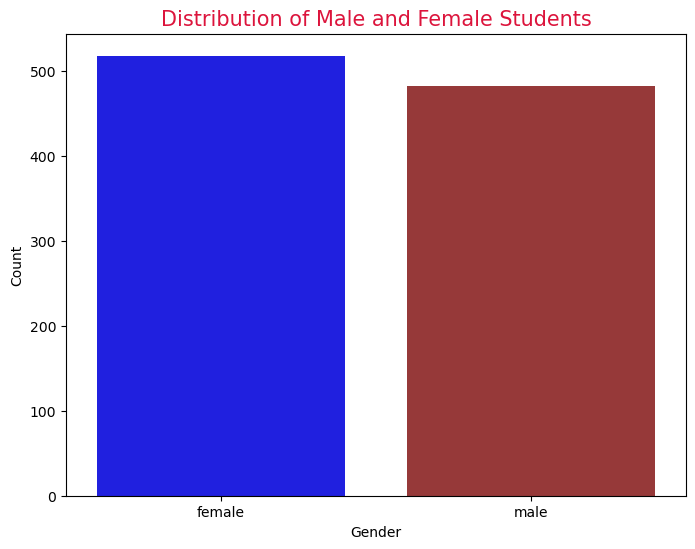

In [120]:
gender_counts = df['gender'].value_counts()
x=gender_counts.index
y=gender_counts.values
plt.figure(figsize=(8, 6))
sns.barplot( x=x, y=y,palette=['blue', 'brown'])
plt.xlabel('Gender')
plt.ylabel('Count')
plt.title('Distribution of Male and Female Students',fontsize=15,color="crimson")
plt.show()

# histogram to show the distribution of the scores in math

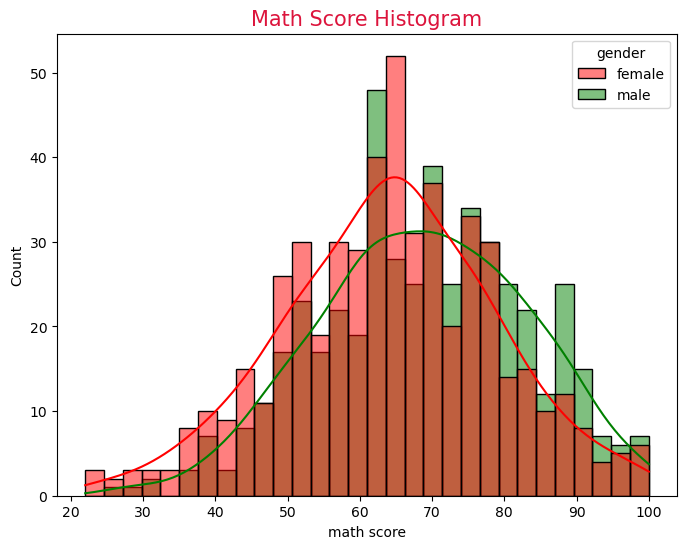

In [121]:
plt.figure(figsize=(8, 6))
sns.histplot(data=df, x="math score", bins=30,palette=["red","green"],kde=True,hue="gender")
plt.title("Math Score Histogram",fontsize=15,color="crimson")
plt.show()

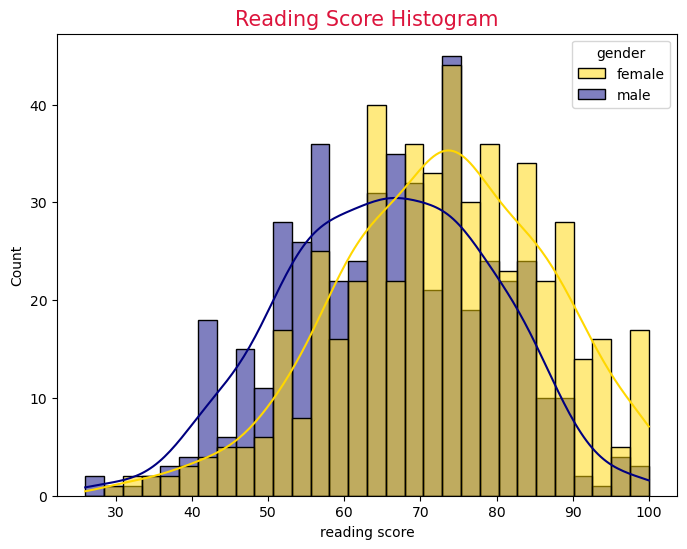

In [122]:
plt.figure(figsize=(8, 6))
sns.histplot(data=df, x="reading score", bins=30,palette=["gold","navy"],kde=True,hue="gender")
plt.title("Reading Score Histogram",fontsize=15,color="crimson")
plt.show()

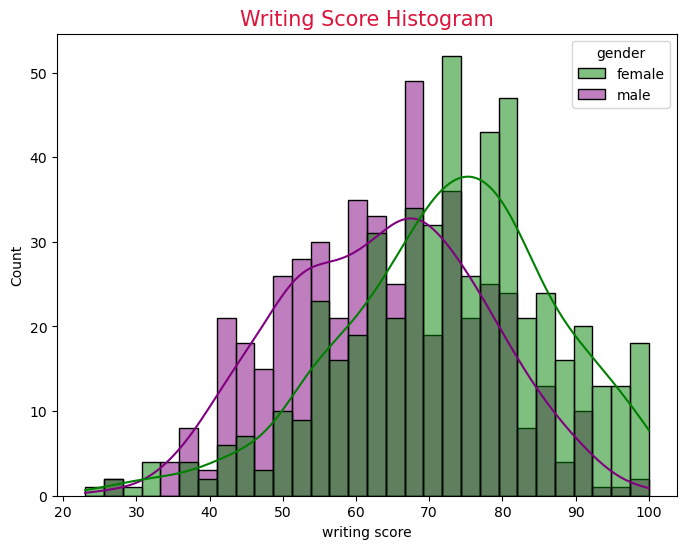

In [123]:
plt.figure(figsize=(8, 6))
sns.histplot(data=df, x="writing score", bins=30,palette=["green","purple"],kde=True,hue="gender")
plt.title("Writing Score Histogram",fontsize=15,color="crimson")
plt.show()

# Create a bar plot to show the average scores in math, reading, and writing for each gender. 


In [124]:

avg_scores = df.groupby('gender').mean(numeric_only=True)
avg_scores

,math score,reading score,writing score
gender,,,
female,64.058372,72.796751,72.579655
male,68.728216,65.663313,63.619882


<div style="border-radius:60px; border:indigo solid; padding: 20px; background-color:#A47BE4; font-size:160%; text-align:center; justify-content: flex-start">
    
For females, the average math score is approximately 64.058, the average reading score is around 72.797, and the average writing score is approximately 72.580.

On the other hand, for males, the average math score is about 68.728, the average reading score is around 65.663, and the average writing score is approximately 63.620.

These scores provide insights into the performance of students in different subjects based on their gender. It is important to note that these values are averages, indicating the general trend rather than individual performances.

From the data, we can observe that, on average, males tend to score higher in math compared to females. Conversely, females tend to have higher average scores in both reading and writing compared to males. However, it's essential to remember that these are just average values and individual variations can exist within each gender.

Further analysis and exploration can be done to determine any potential factors contributing to these score differences, such as teaching methodologies, societal expectations, or individual aptitudes and interests. It is important to approach such analyses with caution and avoid making broad generalizations or assumptions based solely on these scores.


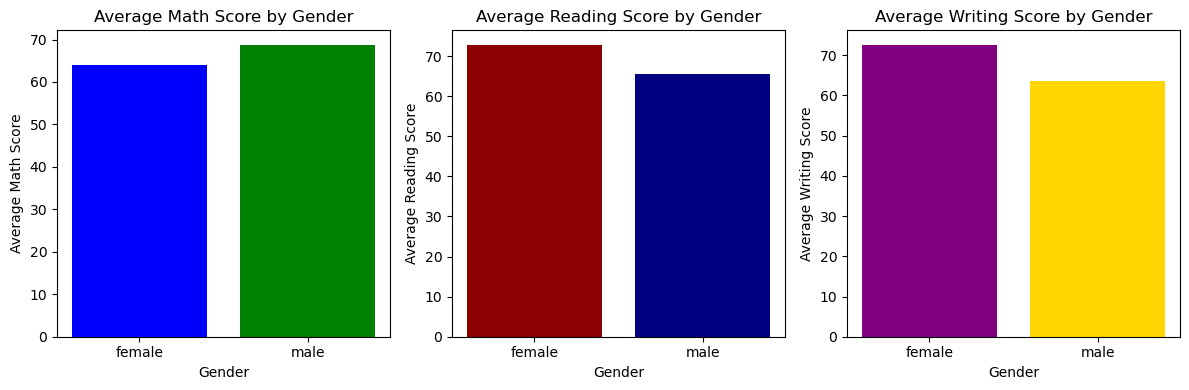

In [125]:

fig, axes = plt.subplots(nrows=1, ncols=3, figsize=(12, 4))

# Bar plot for Math Score
colors = ['blue', 'green']
axes[0].bar(avg_scores.index, avg_scores['math score'],color=colors)
axes[0].set_xlabel('Gender')
axes[0].set_ylabel('Average Math Score')
axes[0].set_title('Average Math Score by Gender')

# Bar plot for Reading Score
my_color=["darkred","navy"]
axes[1].bar(avg_scores.index, avg_scores['reading score'],color=my_color)
axes[1].set_xlabel('Gender')
axes[1].set_ylabel('Average Reading Score')
axes[1].set_title('Average Reading Score by Gender')

# Bar plot for Writing Score
color_new=["purple","gold"]
axes[2].bar(avg_scores.index, avg_scores['writing score'],color=color_new)
axes[2].set_xlabel('Gender')
axes[2].set_ylabel('Average Writing Score')
axes[2].set_title('Average Writing Score by Gender')
plt.tight_layout()
plt.show()

# Create a scatter plot to show the relationship between math, reading, and writing scores.


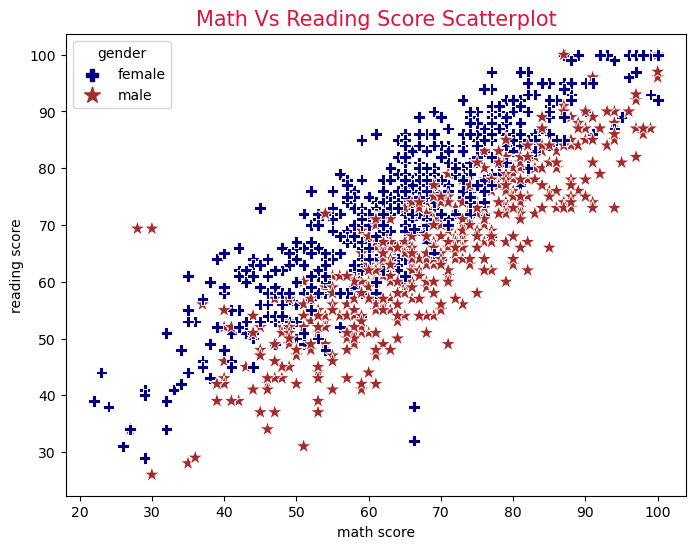

In [126]:
plt.figure(figsize=(8,6))
sns.scatterplot(data=df, x="math score", y="reading score", hue="gender", style="gender",
                markers=["P", "*"],sizes=(140,70),size="gender",palette=["navy","brown"])
plt.title("Math Vs Reading Score Scatterplot",fontsize=15,color="crimson")
plt.show()

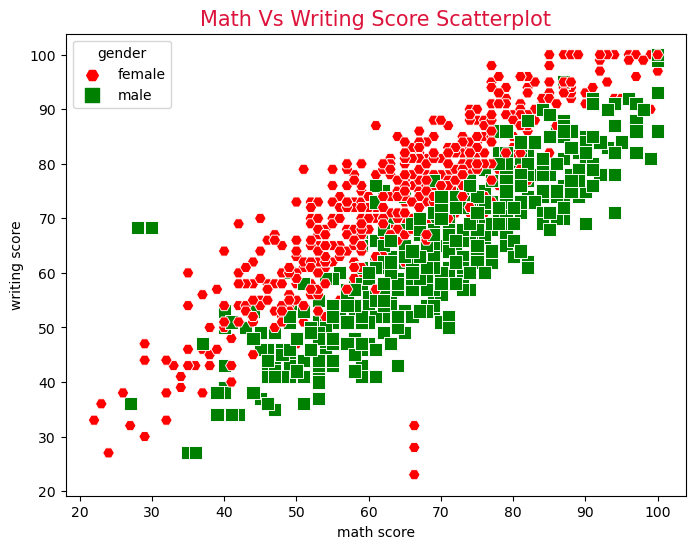

In [127]:
plt.figure(figsize=(8,6))
sns.scatterplot(data=df, x="math score", y="writing score", hue="gender", style="gender",
                markers=["H", "s"],sizes=(90,70),size="gender",palette=["red","green"])
plt.title("Math Vs Writing Score Scatterplot",fontsize=15,color="crimson")
plt.show()

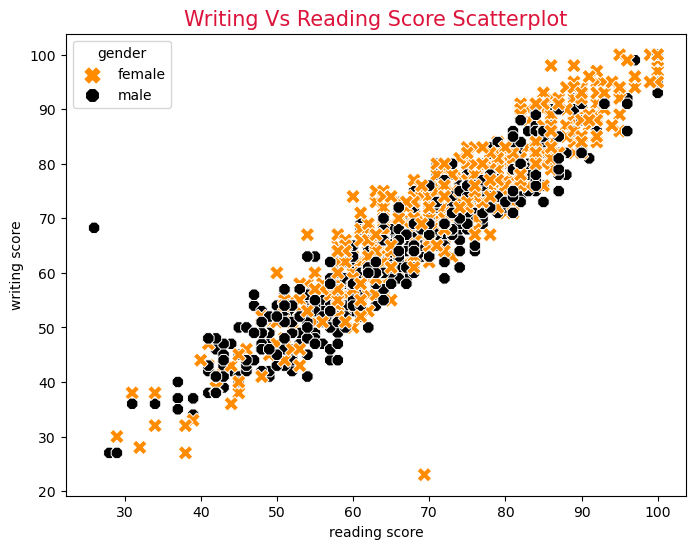

In [128]:
plt.figure(figsize=(8,6))
sns.scatterplot(data=df, x="reading score", y="writing score", hue="gender", style="gender",
                markers=["X", "8"],sizes=(80,110),size="gender",palette=["darkorange","black"])
plt.title("Writing Vs Reading Score Scatterplot",fontsize=15,color="crimson")
plt.show()

<div style="border-radius:60px; border:indigo solid; padding: 20px; background-color:#A47BE4; font-size:160%; text-align:center; justify-content: flex-start">
 Perform basic statistical analysis:
    
- Calculate mean, median, and mode for math, reading, and writing scores. 
- Calculate the standard deviation for math, reading, and writing scores.
- Test if there's a significant difference between male and female students' 
- performance in math, reading, and writing using an appropriate statistical test (e.g., t-test). 


# Calculate Mean Score

In [129]:
math_mean=df["math score"].mean()
read_mean=df["reading score"].mean()
write_mean=df["writing score"].mean()
print(" Math Mean Score :",math_mean)
print(" Reading Mean Score :",read_mean)
print(" Writing Mean Score :",write_mean)

 Math Mean Score : 66.30923694779116
 Reading Mean Score : 69.35843373493975
 Writing Mean Score : 68.26104417670683


In [130]:
mean_scores = {'Math Score': math_mean, 'Reading Score': read_mean, 'Writing Score': write_mean}
df_mean_scores = pd.DataFrame.from_dict(mean_scores, orient='index', columns=['Mean_Score'])
df_mean_scores = df_mean_scores.reset_index()
df_mean_scores

,index,Mean_Score
0,Math Score,66.309237
1,Reading Score,69.358434
2,Writing Score,68.261044


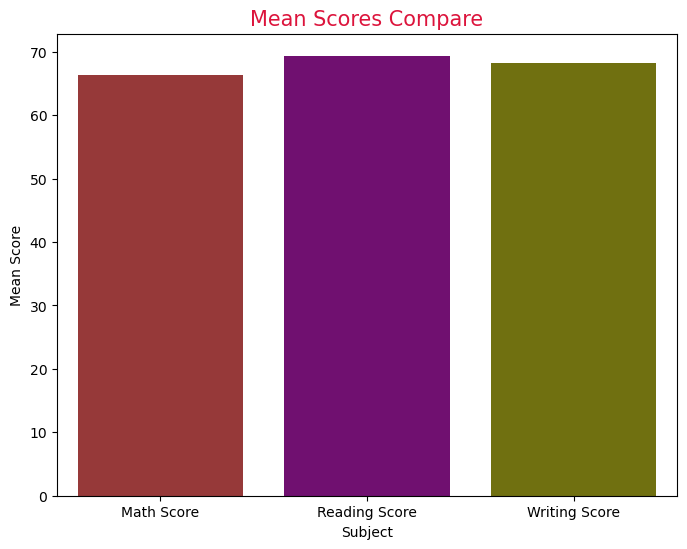

In [131]:
plt.figure(figsize=(8,6))
sns.barplot(x='index', y='Mean_Score', data=df_mean_scores,palette=["brown","purple","olive"])
plt.title('Mean Scores Compare',fontsize=15,color="crimson")
plt.xlabel('Subject')
plt.ylabel('Mean Score')
plt.show()

# Calculate Median Score

In [132]:
math_median=df["math score"].median()
read_median=df["reading score"].median()
write_median=df["writing score"].median()
print(" Math Median Score :",math_median)
print(" Reading Median Score :",read_median)
print(" Writing Median Score :",write_median)

 Math Median Score : 66.0
 Reading Median Score : 70.0
 Writing Median Score : 69.0


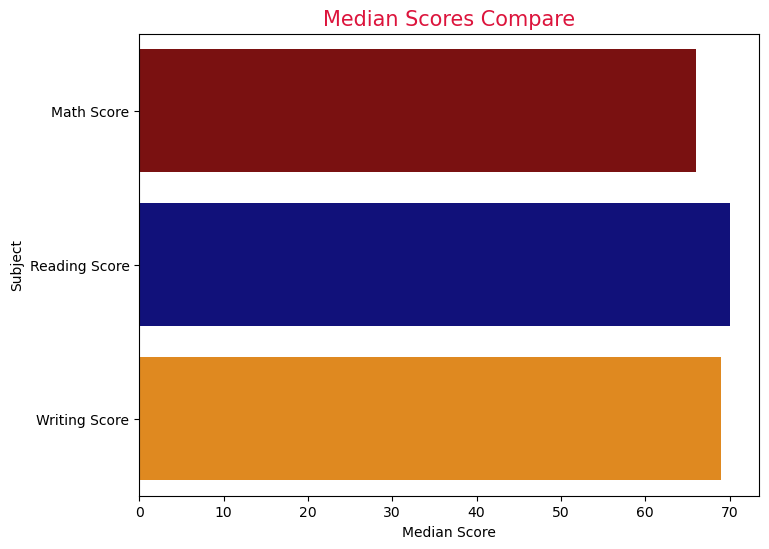

In [133]:
median_score = {'Math Score': math_median, 'Reading Score': read_median, 'Writing Score': write_median}
df_median = pd.DataFrame.from_dict(median_score, orient='index', columns=['Median_Score'])
df_median_score = df_median.reset_index()
plt.figure(figsize=(8,6))
sns.barplot(y='index', x='Median_Score', data=df_median_score,palette=["darkred","darkblue","darkorange"])
plt.title('Median Scores Compare',fontsize=15,color="crimson")
plt.ylabel('Subject')
plt.xlabel('Median Score')
plt.show()

# Calculate Mode Value

In [134]:
math_mode=df["math score"].mode().values[0]
read_mode=df["reading score"].mode().values[0]
write_mode=df["writing score"].mode().values[0]
print("Math Mode Score :",math_mode)
print("Reading Mode Score :",read_mode)
print("Writing Mode Score :",write_mode)

Math Mode Score : 65.0
Reading Mode Score : 72.0
Writing Mode Score : 74.0


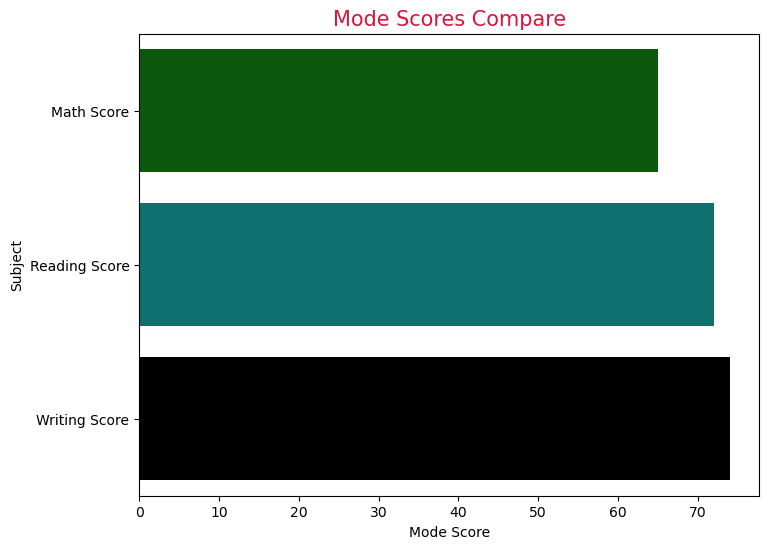

In [135]:
mode_score = {'Math Score': math_mode, 'Reading Score': read_mode, 'Writing Score': write_mode}
df_mode = pd.DataFrame.from_dict(mode_score, orient='index', columns=['Mode_Score'])
df_mode_score = df_mode.reset_index()
plt.figure(figsize=(8,6))
sns.barplot(y='index', x='Mode_Score', data=df_mode_score,palette=["darkgreen","teal","black"])
plt.title('Mode Scores Compare',fontsize=15,color="crimson")
plt.ylabel('Subject')
plt.xlabel('Mode Score')
plt.show()

# Calculate the standard deviation for math, reading, and writing scores.


In [136]:
math_std=df["math score"].std()
read_std=df["reading score"].std()
write_std=df["writing score"].std()
print("Math Std Score :",math_std)
print("Reading Std Score :",read_std)
print("Writing Std Score :",write_std)

Math Std Score : 14.75080815960406
Reading Std Score : 14.289409588328327
Writing Std Score : 14.837192146253315


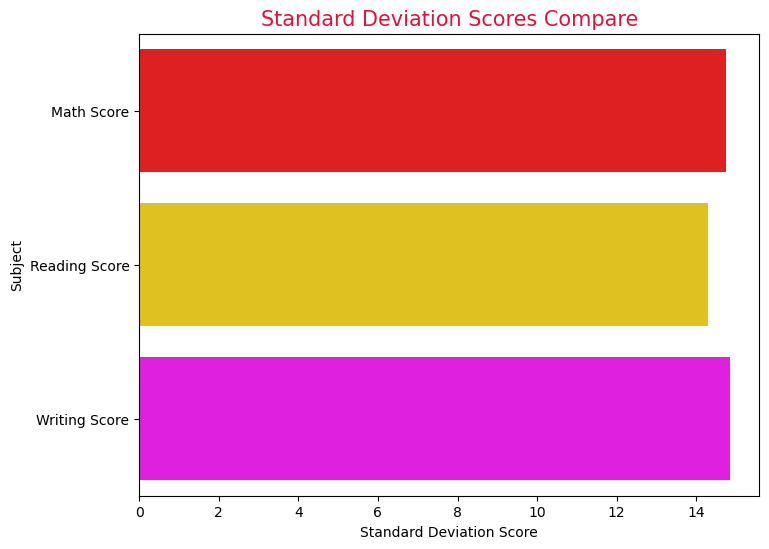

In [137]:
std_score = {'Math Score': math_std, 'Reading Score': read_std, 'Writing Score': write_std}
df_std = pd.DataFrame.from_dict(std_score, orient='index', columns=['Std_Score'])
df_std_score = df_std.reset_index()
plt.figure(figsize=(8,6))
sns.barplot(y='index', x='Std_Score', data=df_std_score,palette=["red","gold","magenta"])
plt.title('Standard Deviation Scores Compare',fontsize=15,color="crimson")
plt.ylabel('Subject')
plt.xlabel('Standard Deviation Score')
plt.show()

# Perform t-test to compare male and female students performance

In [138]:
# Separate the scores for male and female students
math_scores_male = df[df['gender'] == 'male']['math score']
math_scores_female = df[df['gender'] == 'female']['math score']

reading_scores_male = df[df['gender'] == 'male']['reading score']
reading_scores_female = df[df['gender'] == 'female']['reading score']

writing_scores_male = df[df['gender'] == 'male']['writing score']
writing_scores_female = df[df['gender'] == 'female']['writing score']

# Perform the t-test for math scores
t_statistic_math, p_value_math = stats.ttest_ind(math_scores_male, math_scores_female)

# Perform the t-test for reading scores
t_statistic_reading, p_value_reading = stats.ttest_ind(reading_scores_male, reading_scores_female)

# Perform the t-test for writing scores
t_statistic_writing, p_value_writing = stats.ttest_ind(writing_scores_male, writing_scores_female)


print("T-Test Results:\n\n")
print("Math: t-statistic =", t_statistic_math, "p-value =", p_value_math)
print("Reading: t-statistic =", t_statistic_reading, "p-value =", p_value_reading)
print("Writing: t-statistic =", t_statistic_writing, "p-value =", p_value_writing)


T-Test Results:


Math: t-statistic = 5.063676399595585 p-value = 4.896121002149353e-07
Reading: t-statistic = -8.141791621914283 p-value = 1.1540535482977985e-15
Writing: t-statistic = -10.003853701503326 p-value = 1.6163848953625677e-22


# Document And findings: 

<div style="border-radius:60px; border:indigo solid; padding: 20px; background-color:#A47BE4; font-size:160%; text-align:center; justify-content: flex-start">
    
Mean Scores:

Math Mean Score: 66.31
Reading Mean Score: 69.36
Writing Mean Score: 68.26
Median Scores:

Math Median Score: 66.0
Reading Median Score: 70.0
Writing Median Score: 69.0
Mode Scores:

Math Mode Score: 65.0
Reading Mode Score: 72.0
Writing Mode Score: 74.0
Standard Deviation Scores:

Math Std Score: 14.75
Reading Std Score: 14.29
Writing Std Score: 14.84
These statistics provide an overview of the distribution and central tendency of the scores in each subject. The mean represents the average score, the median represents the middle value when the scores are arranged in ascending order, and the mode represents the most frequently occurring score. The standard deviation indicates the amount of variation or spread in the scores.
    

<div style="border-radius:60px; border:indigo solid; padding: 20px; background-color:#A47BE4; font-size:160%; text-align:center; justify-content: flex-start">
 
   Math: The t-statistic for the comparison of math scores between male and female students is approximately 5.064, with a p-value of approximately 4.896e-07.

Reading: The t-statistic for the comparison of reading scores between male and female students is approximately -8.142, with a p-value of approximately 1.154e-15.

Writing: The t-statistic for the comparison of writing scores between male and female students is approximately -10.004, with a p-value of approximately 1.616e-22.

These t-tests were performed to determine whether there are statistically significant differences in the scores between male and female students in each subject. The t-statistic indicates the magnitude of the difference between the two groups, while the p-value represents the probability of observing such a difference by chance alone.

Based on the results, the math scores of male and female students appear to have a statistically significant difference, with males scoring higher on average. Similarly, there are significant differences in reading and writing scores, with females scoring higher on average